In [83]:
import tensorflow as tf
import keras
import numpy as np
import numpy.linalg as la

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
import vec
from vec import Vec
from vecutil import vec2list
from sympy import Matrix
# print(tf.test.gpu_device_name())
# print(tf.config.list_physical_devices('GPU'))

In [40]:
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(500, activation="relu"),
        keras.layers.Dense(500, activation="relu"),
        keras.layers.Dense(500, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid")
    ])
    return model

In [80]:
def plot_train_vs_validation_loss(history, start, end):
    import matplotlib.pyplot as plt
    history_dict = history.history
    loss = history_dict['loss']
    loss = loss[start:end]
    validation_loss = history_dict['val_loss']
    validation_loss = validation_loss[start:end]
    epochs = range(1, len(loss)+1)
    plt.plot(epochs, loss, "yo", label="Training loss")
    plt.plot(epochs, validation_loss, "r", label="Validation loss")
    plt.title("Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

def plot_train_vs_validation_accuracy(history, start, end):
    import matplotlib.pyplot as plt
    history_dict = history.history
    acc = history_dict['accuracy']
    acc = acc[start:end]
    val_acc = history_dict['val_accuracy']
    val_acc = val_acc[start:end]
    epochs = range(1, len(acc)+1)
    plt.plot(epochs, acc, "go", label="Training Accuracy")
    plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

In [42]:
# %load efficient_cancer_data.py
# Copyright 2013 Philip N. Klein

def read_training_data(fname, D=None):
    """Given a file in appropriate format, and given a set D of features,
    returns the pair (A, b) consisting of
    a P-by-D matrix A and a P-vector b,
    where P is a set of patient identification integers (IDs).

    For each patient ID p,
      - row p of A is the D-vector describing patient p's tissue sample,
      - entry p of b is +1 if patient p's tissue is malignant, and -1 if it is benign.

    The set D of features must be a subset of the features in the data (see text).
    """
    file = open(fname)
    params = ["radius", "texture", "perimeter","area","smoothness","compactness","concavity","concave points","symmetry","fractal dimension"];
    stats = ["(mean)", "(stderr)", "(worst)"]
    feature_labels = set([y+x for x in stats for y in params])
    feature_map = {params[i]+stats[j]:j*len(params)+i for i in range(len(params)) for j in range(len(stats))}
    if D is None: D = feature_labels
    feature_vectors = {}
    #patient_diagnoses = {}
    A = []
    b = []
    for line in file:
        row = line.split(",")
        patient_ID = int(row[0])
        b.append(-1) if row[1] == 'B' else b.append(1)
        feature_vectors[patient_ID] = Vec(D, {f:float(row[feature_map[f]+2]) for f in D})
        A.append(vec2list(feature_vectors[patient_ID]))
    return Matrix(A), Matrix(b)
        

In [43]:
data, labels=read_training_data('train.data')

# replace -1 with 0 in labels for sigmoid preparation
labels = [label if label == 1 else 0 for label in labels]

data = np.array(data).astype(np.float32)
labels = np.array(labels).astype(np.float32)

# standardize data
normed_data = (data - data.mean())/data.std()

In [44]:
train_data = data[:225]
train_labels = labels[:225]

test_data = data[225:]
test_labels = labels[225:]

train_data.shape, train_labels.shape

((225, 30), (225,))

In [45]:
model1 = build_model()

model1.compile(
    loss='binary_crossentropy', optimizer="adam", metrics=['accuracy']
)

history = model1.fit(
    train_data,
    train_labels,
    batch_size=128,
    epochs=3000,
    validation_data=(test_data, test_labels)
)

Epoch 1/3000


2022-04-27 17:15:04.864035: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 143ms/step - loss: 32.9181 - accuracy: 0.4978 - val_loss: 113.0445 - val_accuracy: 0.3867
Epoch 2/3000
2/2 [==============================] - 0s 23ms/step - loss: 74.4942 - accuracy: 0.5200 - val_loss: 47.3738 - val_accuracy: 0.3867
Epoch 3/3000
2/2 [==============================] - 0s 22ms/step - loss: 21.0838 - accuracy: 0.5200 - val_loss: 45.3628 - val_accuracy: 0.6133
Epoch 4/3000
2/2 [==============================] - 0s 23ms/step - loss: 52.2091 - accuracy: 0.4800 - val_loss: 17.3713 - val_accuracy: 0.6133
Epoch 5/3000
2/2 [==============================] - 0s 22ms/step - loss: 16.5877 - accuracy: 0.4133 - val_loss: 19.2836 - val_accuracy: 0.3867
Epoch 6/3000
1/2 [==============>...............] - ETA: 0s - loss: 15.9649 - accuracy: 0.4844

2022-04-27 17:15:05.179935: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 23ms/step - loss: 15.2988 - accuracy: 0.5200 - val_loss: 21.1473 - val_accuracy: 0.3867
Epoch 7/3000
2/2 [==============================] - 0s 22ms/step - loss: 14.1586 - accuracy: 0.5200 - val_loss: 7.3572 - val_accuracy: 0.3867
Epoch 8/3000
2/2 [==============================] - 0s 35ms/step - loss: 3.3463 - accuracy: 0.6844 - val_loss: 5.7632 - val_accuracy: 0.6800
Epoch 9/3000
2/2 [==============================] - 0s 50ms/step - loss: 7.1777 - accuracy: 0.5689 - val_loss: 0.5455 - val_accuracy: 0.8933
Epoch 10/3000
2/2 [==============================] - 0s 22ms/step - loss: 1.2866 - accuracy: 0.7644 - val_loss: 4.9226 - val_accuracy: 0.3867
Epoch 11/3000
2/2 [==============================] - 0s 22ms/step - loss: 3.9303 - accuracy: 0.5378 - val_loss: 2.8261 - val_accuracy: 0.4400
Epoch 12/3000
2/2 [==============================] - 0s 23ms/step - loss: 1.4795 - accuracy: 0.6889 - val_loss: 0.5926 - val_accuracy: 0.8800
Epoch 13/3000
2/2 [=

In [51]:
model1.evaluate(data, labels)

10/10 [==============================] - 0s 7ms/step - loss: 0.1361 - accuracy: 0.9900


[0.13608603179454803, 0.9900000095367432]

In [52]:
model1.evaluate(train_data, train_labels)

8/8 [==============================] - 0s 5ms/step - loss: 8.9587e-05 - accuracy: 1.0000


[8.958700345829129e-05, 1.0]

In [53]:
model1.evaluate(test_data, test_labels)

3/3 [==============================] - 0s 7ms/step - loss: 0.5441 - accuracy: 0.9600


[0.5440754294395447, 0.9600000381469727]

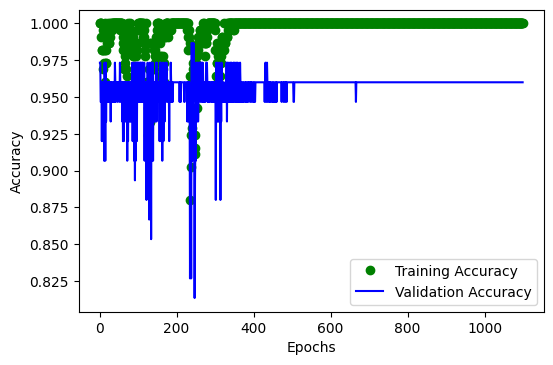

In [87]:
plot_train_vs_validation_accuracy(history, 1900, -1)

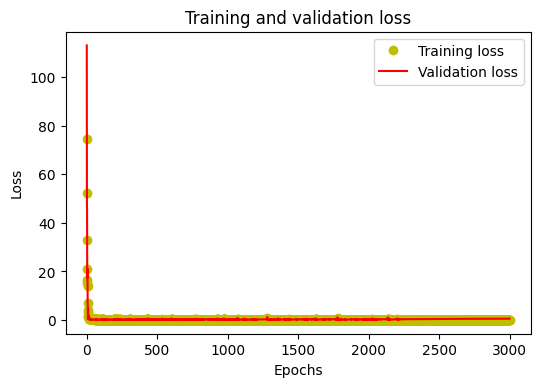

In [86]:
plot_train_vs_validation_loss(history, 0, -1)

In [ ]:
def classify(Us, y, r):
    min_val = float('inf')
    classification = 0
    U_rs = [U[:r] for U in Us]
    for U_r in U_rs:
        x_i = la.inv((U_r.T@U_r))@U_r.T@y
        diff = la.norm(y-U_r@x_i)
        if diff < min_val:
            min_val = diff
            classification = i

    return classification